In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

ferrovial = df[df['empresa'] == 'Ferrovial']

ferrovial.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

ferrovial = ferrovial [['date','open','high','low','close','adj close']]

ferrovial.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

ferrovial['date'] = pd.to_datetime(ferrovial['date'], format="%Y-%m-%d")

ferrovial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 19225 to 20549
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

ferrovial.sort_values(by='date',ascending= True, inplace=True)

ferrovial.head()

,date,open,high,low,close,adj close
20102,2019-01-02,17.535000,17.785000,17.350000,17.709999,15.613222
20103,2019-01-03,17.565001,17.950001,17.525000,17.799999,15.692566
20104,2019-01-04,17.915001,18.100000,17.825001,18.014999,15.882114
20105,2019-01-07,18.014999,18.150000,17.754999,18.150000,16.001127
20106,2019-01-08,18.105000,18.360001,18.049999,18.325001,16.155413


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

ferrovial = ferrovial[(ferrovial['date'] >= fecha_inicio) & (ferrovial['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

ferrovial.shape

(812, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=ferrovial['date'].min(), end=ferrovial['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

ferrovial = ferrovial.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

ferrovial = ferrovial.rename(columns={'index': 'date'})


In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

ferrovial.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,22.920000,23.270000,22.120001,22.209999,20.668922
1,2021-01-05,21.980000,22.260000,21.850000,21.889999,20.371128
2,2021-01-06,22.080000,22.260000,21.870001,22.120001,20.585169
3,2021-01-07,22.219999,22.219999,21.540001,21.820000,20.305984
4,2021-01-08,21.959999,22.389999,21.930000,22.230000,20.687536
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,22.139999,22.180000,21.549999,21.680000,20.175697
8,2021-01-12,21.690001,21.879999,21.600000,21.719999,20.212921
9,2021-01-13,21.690001,21.740000,21.049999,21.049999,19.589413


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

ferrovial = ferrovial.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


ferrovial.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,22.920000,23.270000,22.120001,22.209999,20.668922
1,2021-01-05,21.980000,22.260000,21.850000,21.889999,20.371128
2,2021-01-06,22.080000,22.260000,21.870001,22.120001,20.585169
3,2021-01-07,22.219999,22.219999,21.540001,21.820000,20.305984
4,2021-01-08,21.959999,22.389999,21.930000,22.230000,20.687536
5,2021-01-09,21.959999,22.389999,21.930000,22.230000,20.687536
6,2021-01-10,21.959999,22.389999,21.930000,22.230000,20.687536
7,2021-01-11,22.139999,22.180000,21.549999,21.680000,20.175697
8,2021-01-12,21.690001,21.879999,21.600000,21.719999,20.212921
9,2021-01-13,21.690001,21.740000,21.049999,21.049999,19.589413


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

ferrovial = ferrovial.set_index('date')

ferrovial.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,22.920000,23.270000,22.120001,22.209999,20.668922
2021-01-05,21.980000,22.260000,21.850000,21.889999,20.371128
2021-01-06,22.080000,22.260000,21.870001,22.120001,20.585169
2021-01-07,22.219999,22.219999,21.540001,21.820000,20.305984
2021-01-08,21.959999,22.389999,21.930000,22.230000,20.687536
2021-01-09,21.959999,22.389999,21.930000,22.230000,20.687536
2021-01-10,21.959999,22.389999,21.930000,22.230000,20.687536
2021-01-11,22.139999,22.180000,21.549999,21.680000,20.175697
2021-01-12,21.690001,21.879999,21.600000,21.719999,20.212921


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

ferrovial.index = pd.DatetimeIndex(ferrovial.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

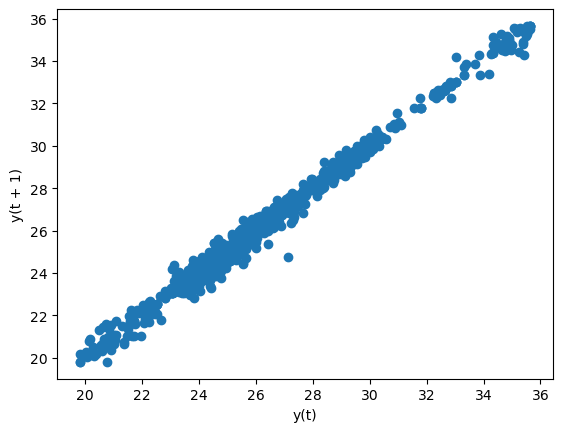

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(ferrovial.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = ferrovial.close[:-10], ferrovial.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(ferrovial.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    35.496968
2024-02-22    35.493942
2024-02-23    35.490920
2024-02-24    35.487903
2024-02-25    35.484890
2024-02-26    35.481883
2024-02-27    35.478880
2024-02-28    35.475882
2024-02-29    35.472889
2024-03-01    35.469901
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    35.450001
2024-02-22    35.400002
2024-02-23    34.900002
2024-02-24    34.900002
2024-02-25    34.900002
2024-02-26    35.000000
2024-02-27    34.750000
2024-02-28    34.450001
2024-02-29    34.650002
2024-03-01    34.500000
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.593404565322988

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,35.450001,35.496968,0.046967
2024-02-22,35.400002,35.493942,0.093940
2024-02-23,34.900002,35.490920,0.590918
2024-02-24,34.900002,35.487903,0.587901
2024-02-25,34.900002,35.484890,0.584888
2024-02-26,35.000000,35.481883,0.481883
2024-02-27,34.750000,35.478880,0.728880
2024-02-28,34.450001,35.475882,1.025881
2024-02-29,34.650002,35.472889,0.822887
2024-03-01,34.500000,35.469901,0.969901
